In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# STEP 2: Define and Create a Project Folder
import os

# Define the path to your new project folder on Google Drive
# We'll call it 'CNN_Beginner_Project'
PROJECT_DIR = '/content/drive/My Drive/CNN_Beginner_Project'

# Create the directory if it doesn't already exist
os.makedirs(PROJECT_DIR, exist_ok=True)

print(f"Project directory created at: {PROJECT_DIR}")

Project directory created at: /content/drive/My Drive/CNN_Beginner_Project


In [3]:
### 100 Cases of Deep Learning - Convolutional Neural Networks (CNNs) for mnist handwritten number recognition | Day 1

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [6]:
# Data Preprocessing
#  Normalization

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(f'New minimum pixel value is {X_train.min()}')
print(f'New maximum pixel value is {X_train.max()}')


New minimum pixel value is 0.0
New maximum pixel value is 1.0


In [7]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [8]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28 ,28 ,1))

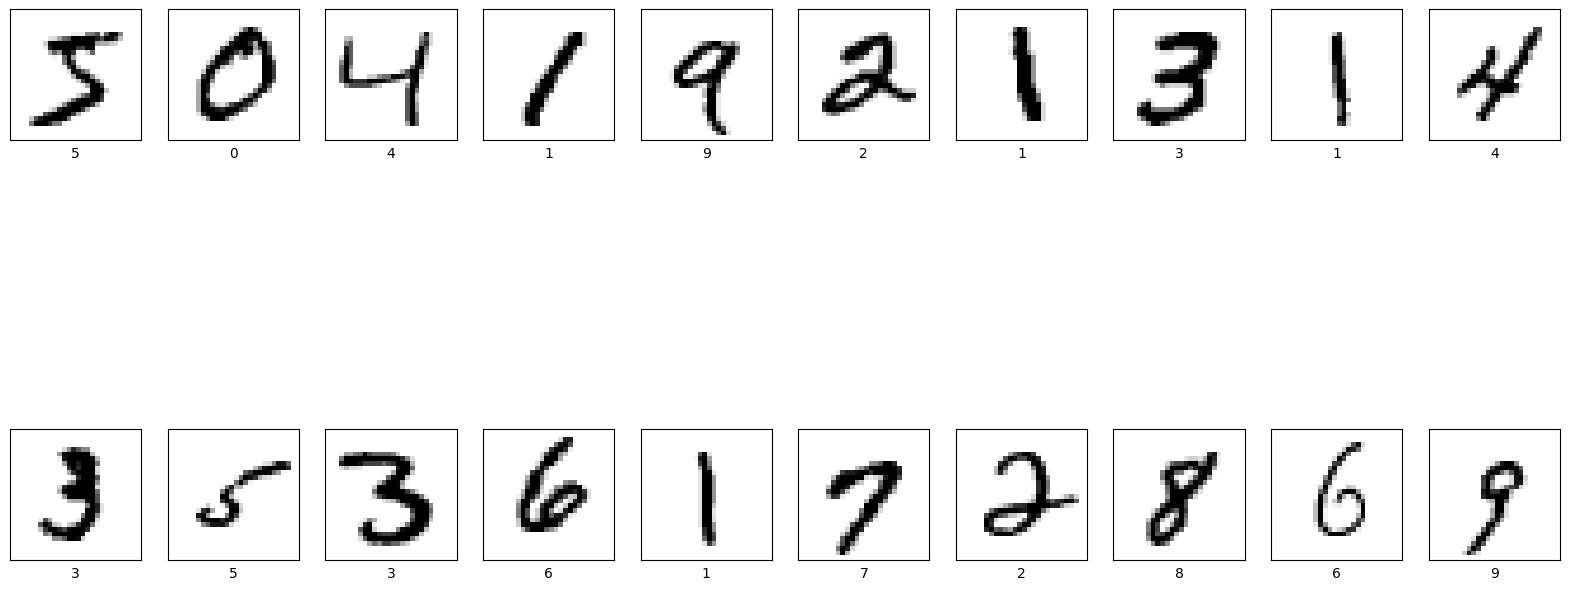

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))

for i in range(20):
  plt.subplot(2,10,i+1)

  plt.xticks([])
  plt.yticks([])

  plt.imshow(X_train[i].reshape(28,28), cmap = plt.cm.binary)

  plt.xlabel(y_train[i])

plt.show()

In [10]:
from tensorflow.keras import layers, models

model = models.Sequential([
       layers.Conv2D(
      filters = 32,
      kernel_size = (3, 3),
      input_shape = (28, 28, 1),
      activation = 'relu'
    ),

    layers.MaxPooling2D(
        pool_size = (2, 2)
    ),

    layers.Conv2D(
        filters = 64,
        kernel_size = (3, 3),
        activation = 'relu'
    ),

    layers.MaxPooling2D(
        pool_size = (2, 2)
    ),
    layers.Flatten(),
    layers.Dense(
        units = 64,
        activation = 'relu'
    ),
    layers.Dropout(0.25),
    layers.Dense(10)
    # layers.Dropout(0.25)


])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#  model compiling

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_data = (X_test, y_test)
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8835 - loss: 0.3793 - val_accuracy: 0.9830 - val_loss: 0.0529
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9794 - loss: 0.0703 - val_accuracy: 0.9890 - val_loss: 0.0313
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9853 - loss: 0.0484 - val_accuracy: 0.9894 - val_loss: 0.0276
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9894 - loss: 0.0368 - val_accuracy: 0.9909 - val_loss: 0.0262
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9900 - loss: 0.0307 - val_accuracy: 0.9907 - val_loss: 0.0288
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9914 - loss: 0.0253 - val_accuracy: 0.9895 - val_loss: 0.0284
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9925 - loss: 0.0208 - val_accuracy: 0.9916 - val_loss: 0.0281
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9938 -

In [12]:
# evaluation

loss, accuracy = model.evaluate(X_test, y_test, verbose = 2)

print(f'Final test loss: {loss:.4f}')
print(f'Final test accuracy: {accuracy:.4f}')

313/313 - 3s - 8ms/step - accuracy: 0.9921 - loss: 0.0266
Final test loss: 0.0266
Final test accuracy: 0.9921


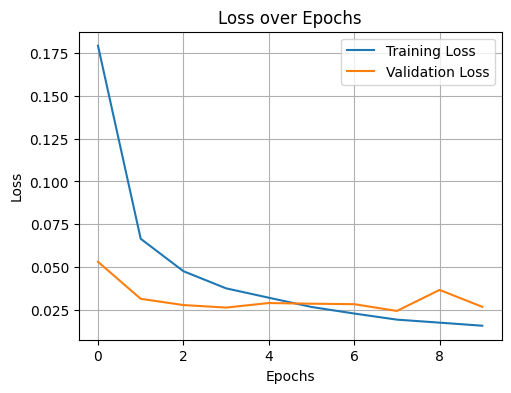

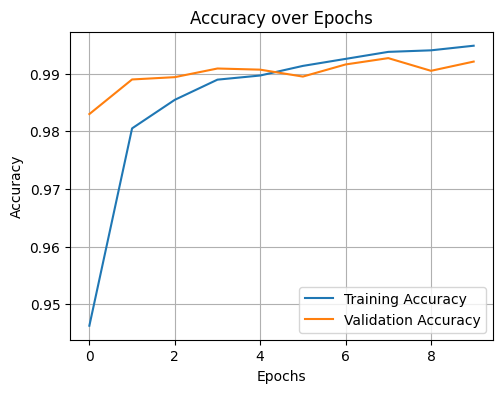

In [13]:
# Loss over Epoch and Accuracy over Epoch graph.

import matplotlib.pyplot as plt
# Loss over Epoch
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title("Loss over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy over Epochs
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


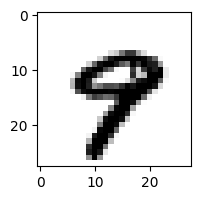

Prediction Array (Logits): 
[-13.682386  -14.696741  -24.074524   -8.120032    3.4982712 -12.244903
 -18.66771    -3.394076    2.976314   16.474495 ]

The model predicts this image is a : 9


In [14]:
#  Preditcion and Visualization
import numpy as np
# predict all test images.
predictions = model.predict(X_test)

# Visualize
plt.figure(figsize = (2,2))
plt.imshow(X_test[9].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

# print the raw logits for the first image
print("Prediction Array (Logits): ")
print(predictions[9])

# Convert to readable probability
predicted_label = np.argmax(predictions[9])
print(f'\nThe model predicts this image is a : {predicted_label}')

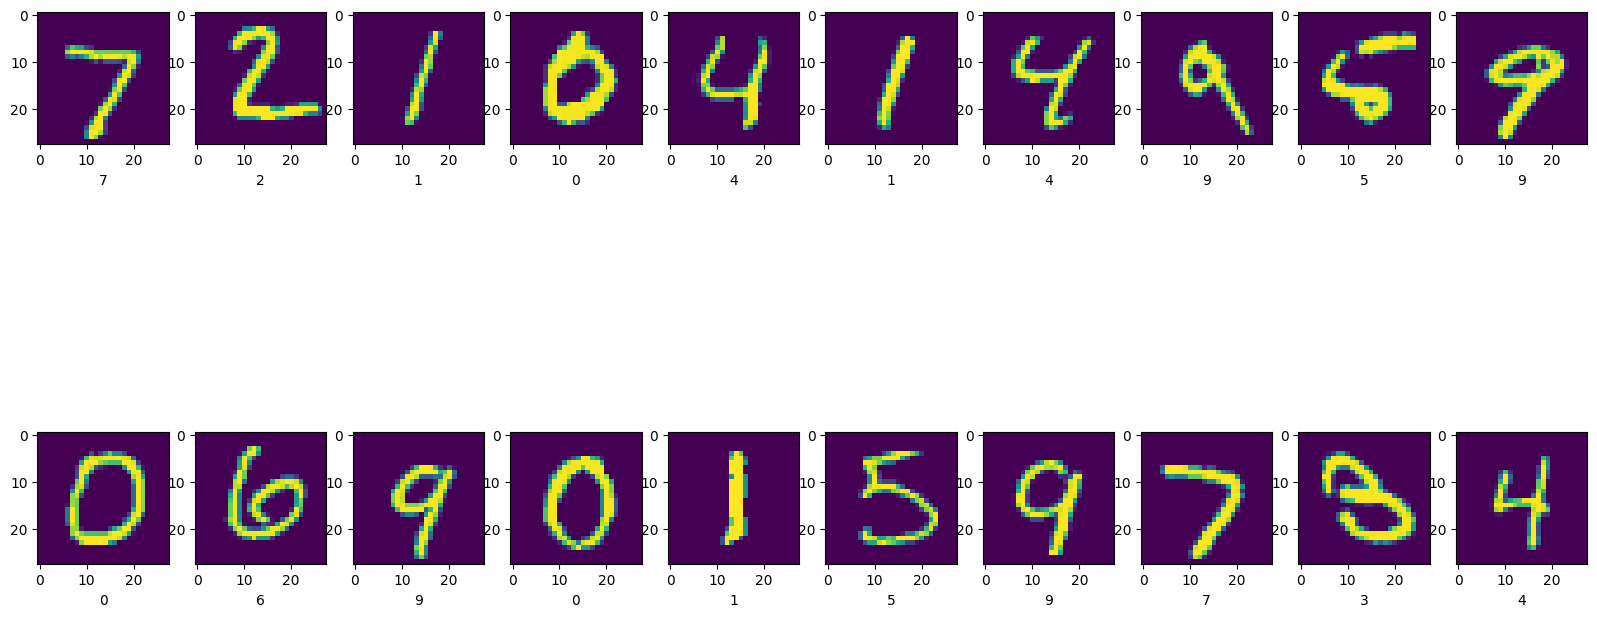

In [19]:
plt.figure(figsize = (20,10))
for i in range(20):
  plt.subplot(2, 10, i+1)
  plt.imshow(X_test[i].reshape(28, 28))
  predicted_label = np.argmax(predictions[i])
  plt.xlabel(predicted_label)
plt.show()

